<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_de_Dados_2023S2/blob/main/Lab_Pandas2_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab: Pandas II

O principal objetivo deste Lab é você explorar o `Pandas` e recursos para várias tarefas importantes na análise de dados como o tratamento de datas, dados nulos, entendimento dos dados, remoção de duplicatas, criação de novas colunas de dados e seleções.

<br>

Referências e Materiais úteis para este Lab:

* [Notas de Aula](https://colab.research.google.com/github/Rogerio-mack/Analise_de_dados_labs/blob/main/Lab_Pandas_notes.ipynb)

<br>

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/PDSH-cover.png
" width=150>

* [Jake VanderPlas. **Python Data Science Handbook**](https://jakevdp.github.io/PythonDataScienceHandbook/)

* [Pandas Cheat Sheet for Data Science in Python](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* [Pandas Manual](https://pandas.pydata.org/)

<br>
---



# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## **CASE: NFL**

Acesse a base de dados [`NFL Offensive Stats`](https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/data/nfl_offensive_stats.csv) para as questões a seguir.



In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/data/nfl_offensive_stats.csv')
df.head()

,game_id,player_id,position,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019


##### Q1. Verifique se existem dados nulos na base. Se sim, exclua as linhas com dados nulos verificando antes o número de linhas antes e depois.

**Comandos úteis:** `.isnull()`, `.dropna()`

In [ ]:
df.isnull().sum().sum()

46

In [ ]:
df.isnull().sum()

game_id            0
player_id          0
position           0
player             0
team               0
                  ..
Wind_Speed         0
Vegas_Line         0
Vegas_Favorite    46
Over_Under         0
game_date          0
Length: 69, dtype: int64

In [ ]:
print('Lines before... ',len(df))
df = df.dropna()
print('Lines after... ',len(df))

Lines before...  19973
Lines after...  19927


##### Q2. Qual o período de jogos coberto pela base de dados?

Dica: 1o, o período é dado pela menor e maior datas dos jogos; 2o, verifique o formato das datas para ter certeza que as funções de `min()` e `max()` traram a informação correta; 3o, se necessário, **pesquise** e empregue a função `pd.to_datetime()` para converter o formato do atributo.

**Comandos úteis:** `.dtypes`, `pd.to_datetime()`

In [ ]:
df.game_date.min(), df.game_date.max()

('1/10/2021', '9/9/2021')

In [ ]:
df.dtypes

game_id            object
player_id          object
position           object
player             object
team               object
                   ...   
Wind_Speed          int64
Vegas_Line        float64
Vegas_Favorite     object
Over_Under        float64
game_date          object
Length: 69, dtype: object

In [ ]:
df.game_date = pd.to_datetime(df.game_date)
df.game_date.max(), df.game_date.min()

(Timestamp('2022-02-13 00:00:00'), Timestamp('2019-09-05 00:00:00'))

##### Q3. Pesquise a função `day_name()` do `pandas` e crie um novo atributo com o nome do dia da semana.

**Comandos úteis:** `.day_name()`

Dica: Veja também como criar uma nova coluna em um DataFrame.

In [ ]:
df['day_name'] = df.game_date.dt.day_name()

# opcionalmente:
df['day_name'] = pd.Categorical(values=df['day_name'], categories=['Sunday', 'Monday',  'Tuesday', 'Wednesday', 'Thursday', 'Friday'],ordered=True) # Set the order for the column as you want


<ipython-input-30-cf647feb6a05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_name'] = df.game_date.dt.day_name()
<ipython-input-30-cf647feb6a05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_name'] = pd.Categorical(values=df['day_name'], categories=['Sunday', 'Monday',  'Tuesday', 'Wednesday', 'Thursday', 'Friday'],ordered=True) # Set the order for the column as you want


##### Q4. Quantos jogos há aos sábados, domingos e segundas-feiras na base?

**Comandos úteis:** `.nunique()`

Dica: antes de responder essa pergunta analise a base. Quantos jogos há na base? Não é o número de linhas!

In [ ]:
len(df)

19927

In [ ]:
df.game_id.nunique()

818

In [ ]:
df[ df.day_name == 'Saturday' ].game_id.nunique()

0

In [ ]:
df[ df.day_name == 'Sunday' ].game_id.nunique()

682

In [ ]:
df[ df.day_name == 'Monday' ].game_id.nunique()

55

##### Q5. Crie um `DataFrame de Jogos`, apenas com o id do jogo, a data e nome do dia da semana, e as características do tempo ('Temperature', 'Humidity', 'Wind_Speed'). Remova as duplicatas.

**Comandos úteis:** `.drop_duplicates()`

In [ ]:
games = df[['game_id','Temperature', 'Humidity', 'Wind_Speed', 'game_date', 'day_name']]
games.head()

,game_id,Temperature,Humidity,Wind_Speed,game_date,day_name
0,201909050chi,65,69,10,2019-09-05,Thursday
1,201909050chi,65,69,10,2019-09-05,Thursday
2,201909050chi,65,69,10,2019-09-05,Thursday
3,201909050chi,65,69,10,2019-09-05,Thursday
4,201909050chi,65,69,10,2019-09-05,Thursday


In [ ]:
games = games.drop_duplicates()

##### Q6. Faça um gráfico de 'distribuição' dos jogos ao longo dos dias da semana. Quais os 3 dias com mais número de jogos?  



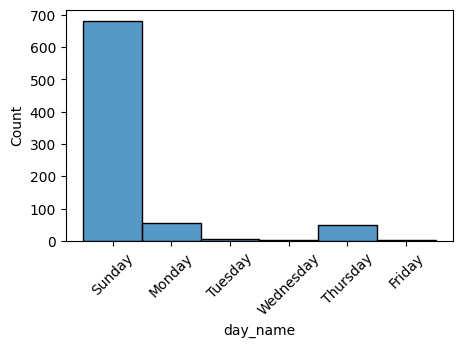

In [ ]:
plt.figure(figsize=(5,3))

sns.histplot(games['day_name'])
plt.xticks(rotation=45)
plt.show()

##### Q7. Baseado nesse histórico de jogos, qual a probabilidade de você ir a um jogo da NFL em um dia em a a temperatura é acima de 70F?

- Menos de 10%
- Entre 10% e 20%
- Entre 21% e 30%
- Entre 31% e 40%
- Entre 41% e 50%
- Mais de 50%  

Sugestão: Faça um gráfico de distribuição da temperatura durantes os jogos, verifique os quartis etc.

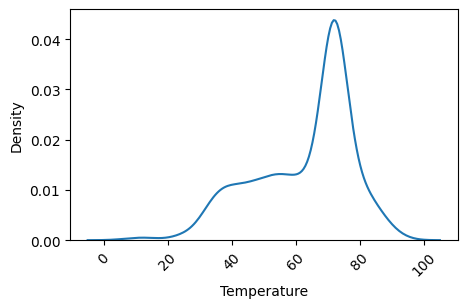

In [ ]:
plt.figure(figsize=(5,3))

sns.kdeplot(games['Temperature'])
plt.xticks(rotation=45)
plt.show()

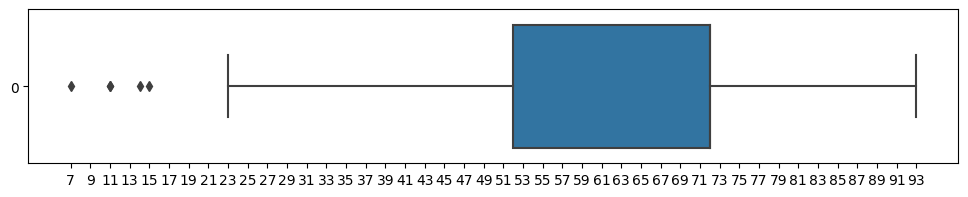

In [ ]:
plt.figure(figsize=(12,2))

sns.boxplot(games['Temperature'],orient='horizontal')
plt.xticks(np.arange(min(games.Temperature),max(games.Temperature)+1,2))
plt.show()

In [ ]:
games.Temperature.describe()

count    818.000000
mean      62.837408
std       15.277818
min        7.000000
25%       52.000000
50%       72.000000
75%       72.000000
max       93.000000
Name: Temperature, dtype: float64

In [ ]:
len( games[ games.Temperature > 70 ] ) / len( games )

0.5146699266503667

##### Q8. Olhando jogadores lances mais rápidos de todas as jogadas (`rush_yds`),

a. Quais as posições dos jogadores (em que posição jogam) nos 10 lances mais rápidos?

b. Qual o time com mais jogadas entre as 10 mais rápidas?

In [ ]:
df[['player_id', 'team', 'position ', 'rush_yds']].nlargest(10,'rush_yds')

,player_id,team,position,rush_yds
12406,TaylJo02,IND,RB,253
12458,HenrDe00,TEN,RB,250
1280,FourLe00,JAX,RB,225
6315,MostRa00,SFO,RB,220
11224,HenrDe00,TEN,RB,215
8417,HenrDe00,TEN,RB,212
5854,HenrDe00,TEN,RB,211
9475,CookDa01,MIN,RB,206
17766,CookDa01,MIN,RB,205
6195,HenrDe00,TEN,RB,195
